In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import numpy as np
from sklearn.decomposition import PCA
from numpy.random import rand
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [11]:
patients = pd.read_csv('../Data/standardized_patients.csv', index_col=0)
patients.shape

(153884, 17)

In [12]:
females = patients[patients['sex'] < 0]

In [13]:
females.shape

(74707, 17)

In [14]:
rus = RandomUnderSampler(sampling_strategy=0.2, random_state=42)
X_resampled, y_resampled = rus.fit_resample(females.iloc[:,:females.shape[1]-1], females['Class'].values)
print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({0: 770, 1: 154})


In [15]:
y = y_resampled

In [16]:
tsne = TSNE(n_components=2, random_state=0, verbose=1).fit_transform(X_resampled)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 924 samples in 0.001s...
[t-SNE] Computed neighbors for 924 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 924 / 924
[t-SNE] Mean sigma: 1.041770
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.543331
[t-SNE] KL divergence after 1000 iterations: 0.796294


In [17]:
tsne

array([[ 30.053465,  -8.540513],
       [ -8.820184, -16.66794 ],
       [-15.734034,  22.13025 ],
       ...,
       [-16.770817,  35.97833 ],
       [ 16.16696 ,   2.966888],
       [-39.955982, -17.69353 ]], dtype=float32)

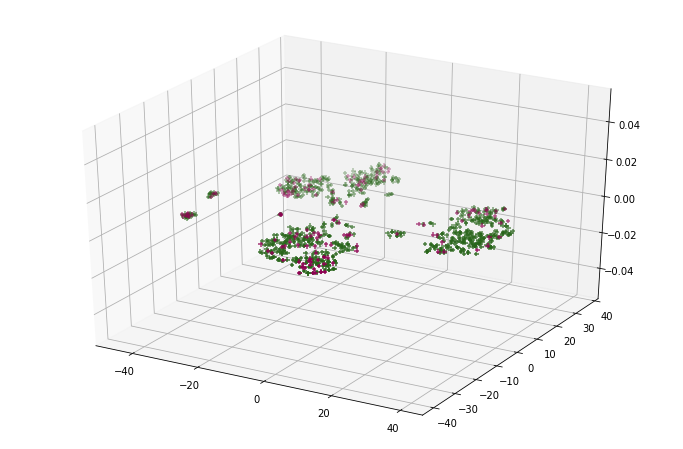

In [18]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*zip(*tsne), c=y, cmap='PiYG_r', marker='+')
plt.show()